# **yaml 작성**

*   data_origin.yaml
*   data_moderate_GAN.yaml
*   data_severe_GAN.yaml
*   data_extreme_GAN.yaml





In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drives')

Mounted at /content/drives


In [ ]:
# data_origin.yaml 파일 작성
yaml_content = """
train: /content/drive/MyDrive/CCTV-People-Dataset/train/images
val: /content/drive/MyDrive/CCTV-People-Dataset/valid/images
test: ../test/images

nc: 1
names: ['Human pose estimation']

roboflow:
  workspace: project-wk4fq
  project: cctv-people
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/project-wk4fq/cctv-people/dataset/1
"""

# 파일 저장
with open('/content/drive/MyDrive/CCTV-People-Dataset/data_origin.yaml', 'w') as f:
    f.write(yaml_content)

# 저장된 파일 확인
!cat /content/drive/MyDrive/CCTV-People-Dataset/data_origin.yaml


train: /content/drive/MyDrive/CCTV-People-Dataset/train/images
val: /content/drive/MyDrive/CCTV-People-Dataset/valid/images
test: ../test/images

nc: 1
names: ['Human pose estimation']

roboflow:
  workspace: project-wk4fq
  project: cctv-people
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/project-wk4fq/cctv-people/dataset/1


In [ ]:
# data_moderate_GAN.yaml 파일 작성
yaml_content = """
train: /content/drive/MyDrive/CCTV-People-Dataset/train/Low_Brightness_Moderate/GAN/images
val: /content/drive/MyDrive/CCTV-People-Dataset/valid/Low_Brightness_Moderate/GAN/images
test: ../test/images

nc: 1
names: ['Human pose estimation']

roboflow:
  workspace: project-wk4fq
  project: cctv-people
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/project-wk4fq/cctv-people/dataset/1
"""

# 파일 저장
with open('/content/drive/MyDrive/CCTV-People-Dataset/yaml/data_moderate_GAN.yaml', 'w') as f:
    f.write(yaml_content)

# 저장된 파일 확인
!cat /content/drive/MyDrive/CCTV-People-Dataset/yaml/data_moderate_GAN.yaml

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/CCTV-People-Dataset/yaml/data_moderate_GAN.yaml'

In [ ]:
# data_severe_GAN.yaml 파일 작성
yaml_content = """
train: /content/drive/MyDrive/CCTV-People-Dataset/train/Low_Brightness_Severe/GAN/images
val: /content/drives/MyDrive/CCTV-People-Dataset/valid/Low_Brightness_Severe/GAN/images
test: ../test/images

nc: 1
names: ['Human pose estimation']

roboflow:
  workspace: project-wk4fq
  project: cctv-people
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/project-wk4fq/cctv-people/dataset/1
"""

# 파일 저장
with open('/content/drives/MyDrive/CCTV-People-Dataset/yaml/data_severe_GAN.yaml', 'w') as f:
    f.write(yaml_content)

# 저장된 파일 확인
!cat /content/drives/MyDrive/CCTV-People-Dataset/yaml/data_severe_GAN.yaml


train: /content/drive/MyDrive/CCTV-People-Dataset/train/Low_Brightness_Severe/GAN/images
val: /content/drives/MyDrive/CCTV-People-Dataset/valid/Low_Brightness_Severe/GAN/images
test: ../test/images

nc: 1
names: ['Human pose estimation']

roboflow:
  workspace: project-wk4fq
  project: cctv-people
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/project-wk4fq/cctv-people/dataset/1


In [ ]:
# data_extreme_GAN.yaml 파일 작성
yaml_content = """
train: /content/drive/MyDrive/CCTV-People-Dataset/train/Low_Brightness_Extreme/GAN/images
val: /content/drives/MyDrive/CCTV-People-Dataset/valid/Low_Brightness_Extreme/GAN/images
test: ../test/images

nc: 1
names: ['Human pose estimation']

roboflow:
  workspace: project-wk4fq
  project: cctv-people
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/project-wk4fq/cctv-people/dataset/1
"""

# 파일 저장
with open('/content/drives/MyDrive/CCTV-People-Dataset/yaml/data_extreme_GAN.yaml', 'w') as f:
    f.write(yaml_content)

# 저장된 파일 확인
!cat /content/drives/MyDrive/CCTV-People-Dataset/yaml/data_extreme_GAN.yaml


train: /content/drive/MyDrive/CCTV-People-Dataset/train/Low_Brightness_Extreme/GAN/images
val: /content/drives/MyDrive/CCTV-People-Dataset/valid/Low_Brightness_Extreme/GAN/images
test: ../test/images

nc: 1
names: ['Human pose estimation']

roboflow:
  workspace: project-wk4fq
  project: cctv-people
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/project-wk4fq/cctv-people/dataset/1


# **yolo**

**train**

In [7]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [ ]:
# train 이미지에 라벨 복사

import os
import shutil

# 원본 라벨 폴더
labels_folder = "/content/drive/MyDrive/CCTV-People-Dataset/train/Original/labels"

# 저조도 이미지 폴더들
low_brightness_folders = [
    "/content/drive/MyDrive/CCTV-People-Dataset/train/Low_Brightness_Moderate/GAN",
    "/content/drive/MyDrive/CCTV-People-Dataset/train/Low_Brightness_Severe/GAN",
    "/content/drive/MyDrive/CCTV-People-Dataset/train/Low_Brightness_Extreme/GAN",
]

# 각 저조도 폴더에 라벨 복사
for folder in low_brightness_folders:
    images_folder = os.path.join(folder, "images")
    labels_output_folder = os.path.join(folder, "labels")

    # 라벨 저장 폴더가 없으면 생성
    os.makedirs(labels_output_folder, exist_ok=True)

    # 이미지 파일 이름에 맞는 라벨 복사
    for image_file in os.listdir(images_folder):
        if image_file.endswith(".jpg"):  # 이미지 파일만 처리
            label_file = image_file.replace(".jpg", ".txt")  # 라벨 파일 이름
            src_label_path = os.path.join(labels_folder, label_file)
            dst_label_path = os.path.join(labels_output_folder, label_file)

            # 라벨 파일 복사
            if os.path.exists(src_label_path):
                shutil.copy(src_label_path, dst_label_path)
            else:
                print(f"Label not found for {image_file}")

In [ ]:
# valid 이미지에 라벨 복사

import os
import shutil

# 원본 라벨 폴더
labels_folder = "/content/drive/MyDrive/CCTV-People-Dataset/valid/Original/labels"

# 저조도 이미지 폴더들
low_brightness_folders = [
    "/content/drive/MyDrive/CCTV-People-Dataset/valid/Low_Brightness_Moderate/GAN",
    "/content/drive/MyDrive/CCTV-People-Dataset/valid/Low_Brightness_Severe/GAN",
    "/content/drive/MyDrive/CCTV-People-Dataset/valid/Low_Brightness_Extreme/GAN",
]

# 각 저조도 폴더에 라벨 복사
for folder in low_brightness_folders:
    images_folder = os.path.join(folder, "images")
    labels_output_folder = os.path.join(folder, "labels")

    # 라벨 저장 폴더가 없으면 생성
    os.makedirs(labels_output_folder, exist_ok=True)

    # 이미지 파일 이름에 맞는 라벨 복사
    for image_file in os.listdir(images_folder):
        if image_file.endswith(".jpg"):  # 이미지 파일만 처리
            label_file = image_file.replace(".jpg", ".txt")  # 라벨 파일 이름
            src_label_path = os.path.join(labels_folder, label_file)
            dst_label_path = os.path.join(labels_output_folder, label_file)

            # 라벨 파일 복사
            if os.path.exists(src_label_path):
                shutil.copy(src_label_path, dst_label_path)
            else:
                print(f"Label not found for {image_file}")

In [ ]:
# moderate 이미지로 학습
!yolo train model=yolo11n.pt \
          data=/content/drive/MyDrive/CCTV-People-Dataset/yaml/data_moderate_GAN.yaml \
          epochs=25 \
          imgsz=640 \
          batch=16 \
          save_period=5 \
          lr0=0.001 \
          optimizer=auto \
          project=/content/drive/MyDrive/CCTV-People-Dataset/runs/train \
          name=moderate

# severe 이미지로 학습
!yolo train model=yolo11n.pt \
          data=/content/drives/MyDrive/CCTV-People-Dataset/yaml/data_severe_GAN.yaml \
          epochs=25 \
          imgsz=640 \
          batch=16 \
          save_period=5 \
          lr0=0.001 \
          optimizer=auto \
          project=/content/drive/MyDrive/CCTV-People-Dataset/runs/train \
          name=severe

# extreme 이미지로 학습
!yolo train model=yolo11n.pt \
          data=/content/drives/MyDrive/CCTV-People-Dataset/yaml/data_extreme_GAN.yaml \
          epochs=25 \
          imgsz=640 \
          batch=16 \
          save_period=5 \
          lr0=0.001 \
          optimizer=auto \
          project=/content/drive/MyDrive/CCTV-People-Dataset/runs/train \
          name=extreme

Ultralytics 8.3.41 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/CCTV-People-Dataset/yaml/data_severe_GAN.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=None, workers=8, project=/content/drive/MyDrive/CCTV-People-Dataset/runs/train, name=severe2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sa

**valid**

In [ ]:
from ultralytics import YOLO

# 원본 데이터로 훈련된 모델 평가
model_original = YOLO('/content/drive/MyDrive/CCTV-People-Dataset/runs/train/best.pt')
results_original = model_original.val(data='/content/drive/MyDrive/CCTV-People-Dataset/yaml/data_origin.yaml')

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/CCTV-People-Dataset/valid/Original/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.22it/s]


                   all        175        227      0.853      0.789      0.862      0.513
Speed: 2.2ms preprocess, 6.7ms inference, 0.0ms loss, 9.7ms postprocess per image
Results saved to runs/detect/val


In [ ]:
from ultralytics import YOLO

# moderate 저조도
model_moderate = YOLO('/content/drive/MyDrive/CCTV-People-Dataset/runs/train/EnlightenGAN/moderate/weights/best.pt')
results_moderate = model_moderate.val(data='/content/drive/MyDrive/CCTV-People-Dataset/yaml/data_moderate_GAN.yaml')

# severe 저조도
model_severe = YOLO('/content/drives/MyDrive/CCTV-People-Dataset/runs/train/gan/enlightengan_severe/weights/best.pt')
results_severe = model_severe.val(data='/content/drives/MyDrive/CCTV-People-Dataset/yaml/data_severe_GAN.yaml')

# extreme 저조도
model_extreme = YOLO('/content/drives/MyDrive/CCTV-People-Dataset/runs/train/gan/enlightengan_extreme/weights/best.pt')
results_extreme = model_extreme.val(data='/content/drives/MyDrive/CCTV-People-Dataset/yaml/data_extreme_GAN.yaml')

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 29.1MB/s]
val: Scanning /content/drives/MyDrive/CCTV-People-Dataset/valid/Low_Brightness_Severe/GAN/labels... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:54<00:00,  3.21it/s]

val: New cache created: /content/drives/MyDrive/CCTV-People-Dataset/valid/Low_Brightness_Severe/GAN/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.12it/s]


                   all        175        227      0.862      0.661      0.784      0.439
Speed: 6.1ms preprocess, 7.9ms inference, 0.0ms loss, 9.7ms postprocess per image
Results saved to runs/detect/val2
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drives/MyDrive/CCTV-People-Dataset/valid/Low_Brightness_Extreme/GAN/labels... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:53<00:00,  3.25it/s]

val: New cache created: /content/drives/MyDrive/CCTV-People-Dataset/valid/Low_Brightness_Extreme/GAN/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]


                   all        175        227      0.844      0.572      0.688       0.36
Speed: 3.5ms preprocess, 4.8ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val3


In [ ]:
# 저장 폴더 이동

import shutil

source = "/content/runs/detect"
destination = "/content/drive/MyDrive/CCTV-People-Dataset"

shutil.move(source, destination)
print(f"{source}가 {destination}로 이동되었습니다.")

/content/runs/detect가 /content/drive/MyDrive/CCTV-People-Dataset로 이동되었습니다.


**평가 지표**

현재 데이터셋에 클래스가 하나('person')만 존재하므로, mAP 값과 AP 값은 동일하게 나타남.

  Condition         Precision (P)            Recall (R)     mAP50  mAP50-95
0    Severe  [0.8620731346331981]  [0.6608162535941418]  0.784161  0.439010
1   Extreme  [0.8440282188684428]  [0.5721352593572414]  0.687874  0.359755


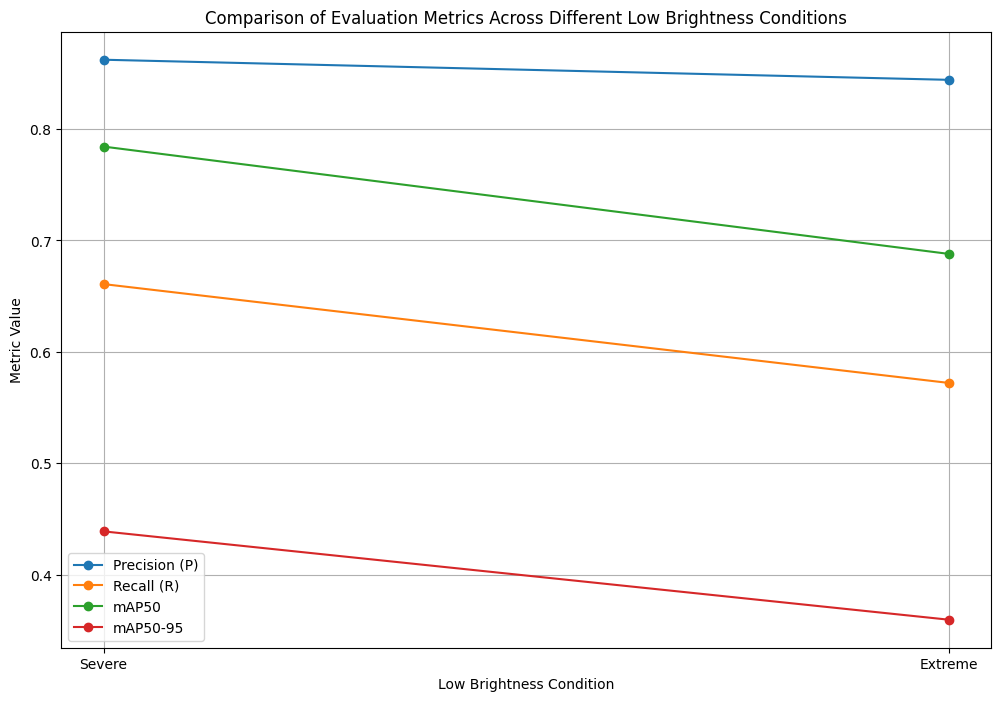

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# YOLO 평가 결과에서 메트릭을 추출합니다.
def extract_metrics(result):
    metrics = {
        "Precision (P)": result.box.p,  # 단일 값으로 사용
        "Recall (R)": result.box.r,     # 단일 값으로 사용
        "mAP50": result.box.map50,      # 단일 값으로 사용
        "mAP50-95": result.box.map      # 단일 값으로 사용
    }
    return metrics

# 각 결과로부터 메트릭을 추출합니다.
metrics_original = extract_metrics(results_original)
metrics_moderate = extract_metrics(results_moderate)
metrics_severe = extract_metrics(results_severe)
metrics_extreme = extract_metrics(results_extreme)

# 결과를 데이터프레임에 저장합니다.
data = {
    "Condition": ["Original", "Moderate", "Severe", "Extreme"],
    "Precision (P)": [metrics_original["Precision (P)"], metrics_moderate["Precision (P)"], metrics_severe["Precision (P)"], metrics_extreme["Precision (P)"]],
    "Recall (R)": [metrics_original["Recall (R)"], metrics_moderate["Recall (R)"], metrics_severe["Recall (R)"], metrics_extreme["Recall (R)"]],
    "mAP50": [metrics_original["mAP50"], metrics_moderate["mAP50"], metrics_severe["mAP50"], metrics_extreme["mAP50"]],
    "mAP50-95": [metrics_original["mAP50-95"], metrics_moderate["mAP50-95"], metrics_severe["mAP50-95"], metrics_extreme["mAP50-95"]],
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 결과 출력 (확인용)
print(df)

# 메트릭 비교를 위한 시각화
metrics = ["Precision (P)", "Recall (R)", "mAP50", "mAP50-95"]
x = df["Condition"]

plt.figure(figsize=(12, 8))

# 각 메트릭을 플롯으로 그립니다.
for metric in metrics:
    plt.plot(x, df[metric], marker='o', label=metric)

# 라벨 및 제목 설정
plt.xlabel("Low Brightness Condition")
plt.ylabel("Metric Value")
plt.title("Comparison of Evaluation Metrics Across Different Low Brightness Conditions")
plt.legend()
plt.grid(True)
plt.show()